<a href="https://colab.research.google.com/github/mosesimbahale0/MyProjects/blob/main/F1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>













# The big picture

Objectives


1.   To find the correlation between marks scored in KCPE and Mid Term Total marks
2. To Find the most improved and most dropped students relative to the expectation
3.   To craft a model that can predict the midterm Total marks given the KCPE marks and other categorical data.






# Data Acquisition & Loading

In [42]:
# Mount google drive in colab
# Follow the on-screen instructions to grant Colab access to your Drive.
# NOTE: This step only needs to be done once per session.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# Load data to Pandas DataFrame
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/dataset/F1DATA.csv')

print(data.head(2))

   CP  OP    ADM           NAME  Stream   KCPE   ENG  KISW   MAT   BIO  ...  \
0   1   1  14940  NEWTON ONGADI   WHITE   371B  75B+  82A-  76A-   81A  ...   
1   1   2  15059    BOAZ MUTOKA  PURPLE  331B-  78B+   90A  64B-  77A-  ...   

   AGRI COMP  FRE  MUS  BST  SE T mks MMearakn. GR. VAP  
0  84A-  NaN  NaN  NaN  98A  11   918   83.4545   A   3  
1  82A-  NaN  NaN  NaN  96A  11   908   82.5455   A   4  

[2 rows x 26 columns]




# Exploratory Data Analysis



* **Get familiar with the data:** Examine the data structure, data types (numerical, categorical, text), and identify basic summary statistics.
* **Visualize the data:** Create visualizations (histograms, scatter plots, box plots) to understand data distributions, identify patterns, and uncover potential relationships between variables.
* **Check for missing values:** Analyze the presence of missing data and decide on appropriate handling strategies (e.g., removal, imputation techniques).
* **Identify outliers:** Explore potential outliers and determine if they require specific treatment (e.g., removal, investigation).


In [44]:
# Check the DataFrame's head
df= pd.DataFrame(data)

df.head(2)

,CP,OP,ADM,NAME,Stream,KCPE,ENG,KISW,MAT,BIO,...,AGRI,COMP,FRE,MUS,BST,SE,T mks,MMearakn.,GR.,VAP
0,1,1,14940,NEWTON ONGADI,WHITE,371B,75B+,82A-,76A-,81A,...,84A-,NaN,NaN,NaN,98A,11,918,83.4545,A,3
1,1,2,15059,BOAZ MUTOKA,PURPLE,331B-,78B+,90A,64B-,77A-,...,82A-,NaN,NaN,NaN,96A,11,908,82.5455,A,4


In [45]:
# Check the DataFrame's tail
df.tail(2)

,CP,OP,ADM,NAME,Stream,KCPE,ENG,KISW,MAT,BIO,...,AGRI,COMP,FRE,MUS,BST,SE,T mks,MMearakn.,GR.,VAP
605,66,605,14865,KISANYA VICTOR INDIAZI,MAROON,278C+,45C-,74B,43C-,10E,...,NaN,NaN,NaN,NaN,52C,10,460,0.0,Z,-7
606,68,605,15285,ANTONY LIANZIKA MIDEGA,SILVER,255C,32D-,52C,45C,17E,...,22E,NaN,NaN,NaN,36D,10,391,0.0,Z,-6


In [46]:
df.describe()

,CP,OP,ADM,SE,T mks,MMearakn.,VAP
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,34.294893,304.084020,15051.304778,10.988468,649.948929,915.449753,0.939044
std,19.630423,175.717908,178.848963,0.176692,123.599530,21103.762704,1.540833
min,1.000000,1.000000,14736.000000,7.000000,207.000000,0.000000,-7.000000
25%,17.000000,153.000000,14895.500000,11.000000,572.000000,52.000000,0.000000
50%,34.000000,304.000000,15051.000000,11.000000,659.000000,59.909100,1.000000
75%,51.000000,455.000000,15206.000000,11.000000,736.000000,67.000000,2.000000
max,73.000000,605.000000,15361.000000,11.000000,918.000000,520000.000000,8.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CP         607 non-null    int64  
 1   OP         607 non-null    int64  
 2   ADM        607 non-null    int64  
 3   NAME       607 non-null    object 
 4   Stream     607 non-null    object 
 5   KCPE       607 non-null    object 
 6   ENG        607 non-null    object 
 7   KISW       605 non-null    object 
 8   MAT        607 non-null    object 
 9   BIO        607 non-null    object 
 10  PHY        606 non-null    object 
 11  CHEM       607 non-null    object 
 12  HIST       607 non-null    object 
 13  GEOG       607 non-null    object 
 14  CRE        605 non-null    object 
 15  AD         53 non-null     object 
 16  AGRI       219 non-null    object 
 17  COMP       134 non-null    object 
 18  FRE        95 non-null     object 
 19  MUS        105 non-null    object 
 20  BST       

**OBJECTIVE 1 : TO FIND CORRELATION BETWEEN KCPE AND T MKS**

In [48]:

# Make a copy to avoid modifying the original DataFrame
df2 = df.copy()

# Handle non-string data types
if df2['KCPE'].dtype != 'object':
  df2['KCPE'] = df2['KCPE'].astype(str)

# Remove all characters except numbers from the "KCPE" column
df2["KCPE"] = df2["KCPE"].str.extract('(\d+)')

# Convert the "KCPE" column to numeric (assuming integers)
df2["KCPE"] = pd.to_numeric(df2["KCPE"], errors='coerce')  # Handle non-numeric values

# Calculate the correlation (assuming df2 and df have the same columns)
correlation = df2["KCPE"].corr(df["T mks"])

# Print the correlation coefficient
print("Correlation between KCPE and T mks:", correlation)


Correlation between KCPE and T mks: 0.5443258195145292


# Data Cleaning & Preprocessing

* **Handle missing values:** Implement your chosen strategy to address missing data points (e.g., deletion, imputation).
* **Address inconsistencies:** Correct errors, typos, and formatting issues within the data.
* **Encode categorical variables:**  Convert categorical data into numerical representations suitable for modeling (e.g., one-hot encoding, label encoding).
* **Feature Scaling or Normalization:**  If necessary, scale or normalize the features to a common range for improved model performance.
* **Feature Engineering:** Create new features by combining existing ones, transforming features, or extracting additional information to potentially enhance model performance.  

**HANDLE MISSING VALUES**

In [78]:
# DROP USELESS COLUMNS
df3 = df2.drop(columns=['ADM','NAME','SE','VAP'], axis=1, inplace=False)
print(df3.head(2))

# Check for null values in the 'Name' column
null_values_in_KCPE = df3['KCPE'].isnull()

# Print the number of null values
print('-------------------------------------------------------------------')
print("Number of NULL values in 'KCPE':", null_values_in_KCPE.sum())
print('-------------------------------------------------------------------')


   CP  OP  Stream   KCPE   ENG  KISW   MAT   BIO   PHY CHEM  ...   CRE   AD  \
0   1   1   WHITE  371.0  75B+  82A-  76A-   81A  57C+  84A  ...  100A  NaN   
1   1   2  PURPLE  331.0  78B+   90A  64B-  77A-  78A-  80A  ...   96A  NaN   

   AGRI COMP  FRE  MUS  BST T mks MMearakn.  GR.  
0  84A-  NaN  NaN  NaN  98A   918   83.4545    A  
1  82A-  NaN  NaN  NaN  96A   908   82.5455    A  

[2 rows x 22 columns]
-------------------------------------------------------------------
Number of NULL values in 'KCPE': 6
-------------------------------------------------------------------


In [79]:

df3['KCPE'].fillna(df3['KCPE'].mean(), inplace=True)

null_values_in_KCPE=df3['KCPE'].isnull()

# Print the number of null values
print('-------------------------------------------------------------------')
print("Number of null values in 'KCPE':", null_values_in_KCPE.sum())
print('-------------------------------------------------------------------')
df3.head(2)

-------------------------------------------------------------------
Number of null values in 'KCPE': 0
-------------------------------------------------------------------


,CP,OP,Stream,KCPE,ENG,KISW,MAT,BIO,PHY,CHEM,...,CRE,AD,AGRI,COMP,FRE,MUS,BST,T mks,MMearakn.,GR.
0,1,1,WHITE,371.0,75B+,82A-,76A-,81A,57C+,84A,...,100A,NaN,84A-,NaN,NaN,NaN,98A,918,83.4545,A
1,1,2,PURPLE,331.0,78B+,90A,64B-,77A-,78A-,80A,...,96A,NaN,82A-,NaN,NaN,NaN,96A,908,82.5455,A


**HANDLE DUPLICATE RECORDS**



In [80]:
# Check for duplicate rows
duplicates = df3.duplicated()

# Print the number of duplicates (without considering the first occurrence)
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


**ADDRESS INCONCISTENCIES, DATA TYPES & CONVERSION**

In [81]:
df3.dtypes

CP             int64
OP             int64
Stream        object
KCPE         float64
ENG           object
KISW          object
MAT           object
BIO           object
PHY           object
CHEM          object
HIST          object
GEOG          object
CRE           object
AD            object
AGRI          object
COMP          object
FRE           object
MUS           object
BST           object
T mks          int64
MMearakn.    float64
GR.           object
dtype: object

**ENCODE CATEGORICAL DATA**

In [82]:
# To improve model performance we include Categorical data e.g.(CP,OP,Stream, Subjects,M,Mearakn)
# Pandas provides  the get_dummies function which converts categorical values into numerical format(Binary format)
# such that it is recognized by the algorithm as a placeholder for values and not hierarchical data
# that can undergo numerical analysis.
# ------------------------------------------------------------
# DROP USELESS COLUMNS
df4 = df2.drop(columns=['ADM','NAME','SE','VAP'], axis=1, inplace=False)
#print(df4.head(2))

# Handle non-string data types
if df4['KCPE'].dtype != 'object':
  df4['KCPE'] = df4['KCPE'].astype(str)

# Remove all characters except numbers from the "KCPE" column
df4["KCPE"] = df4["KCPE"].str.extract('(\d+)')

# Convert the "KCPE" column to numeric (assuming integers)
df4["KCPE"] = pd.to_numeric(df4["KCPE"], errors='coerce')  # Handle non-numeric values
#-----------------------------------------------------------------


#---------------------------------------------------------------------------------
# LABEL ENCODING FOR STREAM
from sklearn.preprocessing import LabelEncoder

# Identify categorical features i.e. Stream
categorical_features = ['Stream']

# Encode categorical features
encoder = LabelEncoder()
for col in categorical_features:
  df4[col] = encoder.fit_transform(df4[col])
#---------------------------------------------------------------------------------

# TODO:
# ORDINAL ENCODING FOR SUBJECTS.
# subject categories have a clear and meaningful order.
# Some combinations of subjects are more difficult than others.
# Different combos i.e. Combo1, Combo2, Combo3



#---------------------------------------------------------------------------------
# ONE-HOT ENCODING FOR SUBJECTS

# Define subject columns
#subject_cols = ['ENG','KISW','MAT','BIO','PHY','CHEM','HIST','GEOG','CRE','AD','AGRI','COMP','FRE','MUS','BST']

# Create a function for one-hot encoding
#def encode_onehot(df4, col_names):
#  encoded_df = pd.get_dummies(df4, columns=col_names)
#  return encoded_df

# Apply one-hot encoding to subject columns
#df4 = encode_onehot(df4.copy(), subject_cols)  # Copy to avoid modifying original

# CUSTOM ENCODING FOR SUBJECTS (1 IF SUBJECT IS TAKEN & 0 IF NOT)
subject_cols = ['ENG','KISW','MAT','BIO','PHY','CHEM','HIST','GEOG','CRE','AD','AGRI','COMP','FRE','MUS','BST']

def encode_marks_and_subjects_inplace(df):
  # Replace empty cells with NaN (missing values)
  df.fillna(pd.NA, inplace=True)

  # Define a function to encode a single cell (missing: 0, available: 1)
  def encode_cell(val):
    return 1 if pd.notna(val) else 0

  # Encode marks availability directly in columns
  for col in subject_cols:
    df[col] = df[col].apply(encode_cell)

# Create a new, empty DataFrame with the same column names as df4
df_custom_encoder = df4.iloc[:, :].copy()  # Select all columns and copy

# Apply encoding functions (modifies df_custom_encoder directly)
encode_marks_and_subjects_inplace(df_custom_encoder)

# df_custom_encoder now has original values replaced with 0 (missing) or 1 (available)
print(df_custom_encoder)






# CREATE A NEW DATAFRAME WITH ENCODED COLUMNS
encoded_features = df_custom_encoder.drop(columns=['CP','OP','Stream','KCPE','GR.','MMearakn.','T mks'], axis=1, inplace=False)
print(df_custom_encoder.head(2))


# Combine label-encoded categorical features and one-hot encoded features
df_encoded = pd.concat([df4[categorical_features], encoded_features], axis=1)

print('--------------------------------------')
print(df_encoded.head(2))


     CP   OP  Stream   KCPE  ENG  KISW  MAT  BIO  PHY  CHEM  ...  CRE  AD  \
0     1    1       7  371.0    1     1    1    1    1     1  ...    1   0   
1     1    2       4  331.0    1     1    1    1    1     1  ...    1   0   
2     1    3       6  376.0    1     1    1    1    1     1  ...    1   0   
3     1    4       1  378.0    1     1    1    1    1     1  ...    1   0   
4     1    4       3  382.0    1     1    1    1    1     1  ...    1   0   
..   ..  ...     ...    ...  ...   ...  ...  ...  ...   ...  ...  ...  ..   
602  67  603       6  346.0    1     1    1    1    1     1  ...    1   1   
603  69  605       8    NaN    1     0    1    1    0     1  ...    0   0   
604  68  605       0  282.0    1     0    1    1    1     1  ...    1   0   
605  66  605       3  278.0    1     1    1    1    1     1  ...    1   0   
606  68  605       6  255.0    1     1    1    1    1     1  ...    0   0   

     AGRI  COMP  FRE  MUS  BST  T mks  MMearakn.  GR.  
0       1     0    

In [83]:
# Check for null values in all columns
null_values_count = df_encoded.isna().sum()

# Print the count of null values in each column
print("Null values count in each column:\n", null_values_count)

Null values count in each column:
 Stream    0
ENG       0
KISW      0
MAT       0
BIO       0
PHY       0
CHEM      0
HIST      0
GEOG      0
CRE       0
AD        0
AGRI      0
COMP      0
FRE       0
MUS       0
BST       0
dtype: int64


**HANDLE OUTLIERS**

Outliers visualization techniques

* Box Plot: This is a common choice for visualizing outliers. It shows the distribution of data points, including the median, quartiles (Q1, Q3), and potential outliers beyond the interquartile range (IQR).
* Scatter Plot: A scatter plot can be useful for visualizing individual data points, especially if you have two numerical features. You can color-code points to highlight potential outliers.
* Histogram: A histogram shows the frequency distribution of data points. It can reveal skewness in the data and the presence of outliers on the tails of the distribution.


In [84]:
df4.dtypes

CP             int64
OP             int64
Stream         int64
KCPE         float64
ENG           object
KISW          object
MAT           object
BIO           object
PHY           object
CHEM          object
HIST          object
GEOG          object
CRE           object
AD            object
AGRI          object
COMP          object
FRE           object
MUS           object
BST           object
T mks          int64
MMearakn.    float64
GR.           object
dtype: object

In [85]:

# Handle non-string data types
if df4['KCPE'].dtype != 'object':
  df4['KCPE'] = df4['KCPE'].astype(str)

# Remove all characters except numbers from the "KCPE" column
df4["KCPE"] = df4["KCPE"].str.extract('(\d+)')

# Convert the "KCPE" column to numeric (assuming integers)
df4["KCPE"] = pd.to_numeric(df4["KCPE"], errors='coerce')  # Handle non-numeric values

# Convert 'KCPE' to float
df4['KCPE'] = df4['KCPE'].astype(float)

<Figure size 640x480 with 0 Axes>

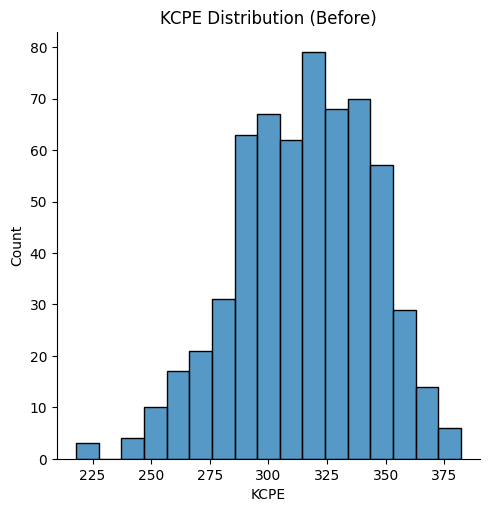

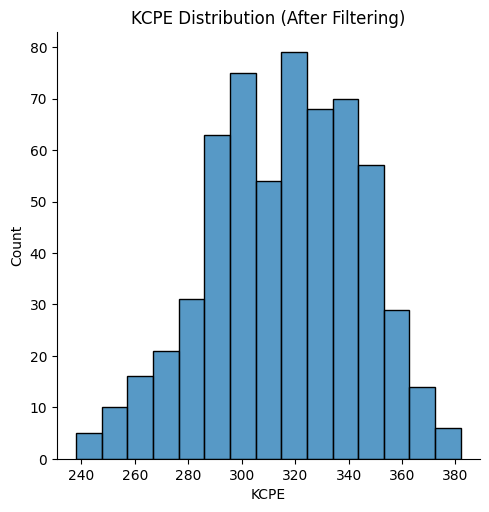

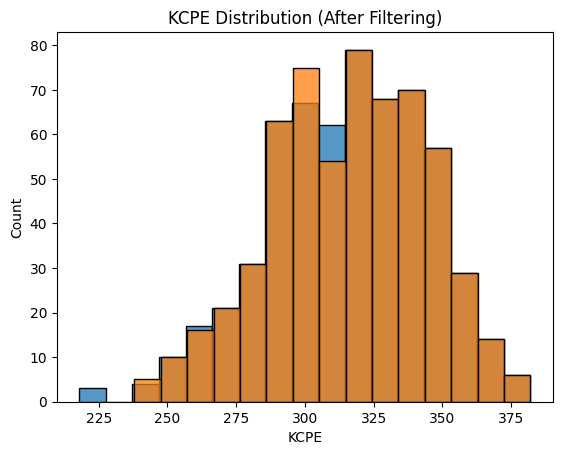

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_data(df4, KCPE, kind='dist'):
  # Plot before handling outliers
  plt.figure()  # Create a new figure for each plot type
  if kind == 'dist':
    sns.displot(df4[KCPE])  # Use displot for distribution curve
  elif kind == 'hist':
    sns.histplot(df4[KCPE])  # Use histplot for histogram
  else:
    raise ValueError("kind must be 'dist' or 'hist'")
  plt.title(f"{KCPE} Distribution (Before)")

  #---------------------------------------------------------------------------------
  # Define IQR for outlier filtering
  IQR = df4[KCPE].quantile(0.75) - df4[KCPE].quantile(0.25)
  lower_bound = df4[KCPE].quantile(0.25) - (1.5 * IQR)
  upper_bound = df4[KCPE].quantile(0.75) + (1.5 * IQR)

  # Filter outliers
  df_filtered = df4.query(f"{KCPE} > @lower_bound and {KCPE} < @upper_bound")
  #---------------------------------------------------------------------------------

  # Plot after handling outliers
  if kind == 'dist':
    sns.displot(df_filtered[KCPE])
  elif kind == 'hist':
    sns.histplot(df_filtered[KCPE])
  else:
    raise ValueError("kind must be 'dist' or 'hist'")
  plt.title(f"{KCPE} Distribution (After Filtering)")
  plt.show()

# Example usage (using distribution curve)
visualize_data(df4, 'KCPE')

# Example usage (using histogram)
visualize_data(df4, 'KCPE', kind='hist')




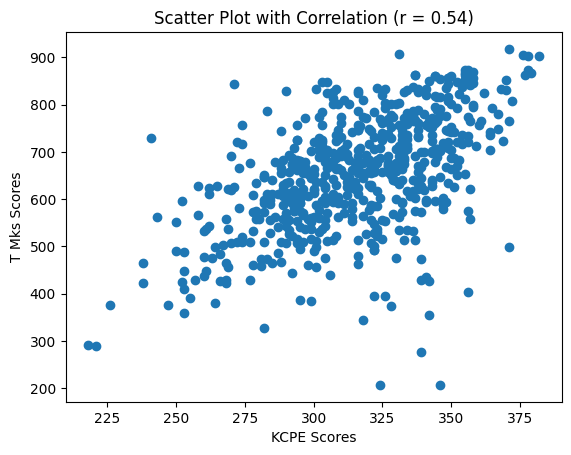

In [87]:
# A scatter plot to show the correlation between KCPE Marks and Total Marks Scored
import matplotlib.pyplot as plt

kcpe = df2["KCPE"]
t_mks = df2["T mks"]

# Calculate the correlation coefficient
correlation = kcpe.corr(t_mks)

# Create the scatter plot
plt.scatter(kcpe, t_mks)

# Add labels and title
plt.xlabel("KCPE Scores")
plt.ylabel("T Mks Scores")
plt.title("Scatter Plot with Correlation (r = {:.2f})".format(correlation))

# Show the plot
plt.show()

# Model Building

* **Choose a modeling technique:** Select a machine learning or statistical modeling approach suitable for your task (e.g., classification, regression).
* **Split data into training and testing sets:** Divide your data into two subsets: a training set used to build the model and a testing set used to evaluate its generalizability.
* **Train the model:** Train the model on the training data, allowing it to learn from the data and build relationships between features and the target variable.
* **Hyperparameter tuning:**  Adjust hyperparameters (model configuration settings) to optimize model performance on the training data.

In [88]:
print(df_encoded)
print()
print('-----------------------------')
print()
print(categorical_features)

     Stream  ENG  KISW  MAT  BIO  PHY  CHEM  HIST  GEOG  CRE  AD  AGRI  COMP  \
0         7    1     1    1    1    1     1     1     1    1   0     1     0   
1         4    1     1    1    1    1     1     1     1    1   0     1     0   
2         6    1     1    1    1    1     1     1     1    1   0     1     0   
3         1    1     1    1    1    1     1     1     1    1   0     0     0   
4         3    1     1    1    1    1     1     1     1    1   0     0     0   
..      ...  ...   ...  ...  ...  ...   ...   ...   ...  ...  ..   ...   ...   
602       6    1     1    1    1    1     1     1     1    1   1     0     0   
603       8    1     0    1    1    0     1     1     1    0   0     0     0   
604       0    1     0    1    1    1     1     1     1    1   0     0     1   
605       3    1     1    1    1    1     1     1     1    1   0     0     0   
606       6    1     1    1    1    1     1     1     1    0   0     1     0   

     FRE  MUS  BST  
0      0    0    1

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



#----------------HANDLE MISSING VALUES -------------
# Handle non-string data types
if df4['KCPE'].dtype != 'object':
  df4['KCPE'] = df4['KCPE'].astype(str)

# Remove all characters except numbers from the "KCPE" column
df4["KCPE"] = df4["KCPE"].str.extract('(\d+)')

# Convert the "KCPE" column to numeric (assuming integers)
df4["KCPE"] = pd.to_numeric(df4["KCPE"], errors='coerce')  # Handle non-numeric values

# Convert 'KCPE' to float
df4['KCPE'] = df4['KCPE'].astype(float)

df4['KCPE'].fillna(df4['KCPE'].mean(), inplace=True)




# Select features and target variable (including encoded categorical features)
X = pd.concat([df4[['KCPE']], df_encoded ], axis=1)
y = df4['T mks']

print('------------X AXIS ----------------')
print(X.head(2))

print('------------Y AXIS ----------------')
print(y.head(2))




print('----------- NULL CHECKS ----------------')
# Ensuring No null values
# Check for null values in all columns
null_values_count2 = X.isna().sum()

# Print the count of null values in each column
print("Null values count in each column:\n", null_values_count2)

------------X AXIS ----------------
    KCPE  Stream  ENG  KISW  MAT  BIO  PHY  CHEM  HIST  GEOG  CRE  AD  AGRI  \
0  371.0       7    1     1    1    1    1     1     1     1    1   0     1   
1  331.0       4    1     1    1    1    1     1     1     1    1   0     1   

   COMP  FRE  MUS  BST  
0     0    0    0    1  
1     0    0    0    1  
------------Y AXIS ----------------
0    918
1    908
Name: T mks, dtype: int64
----------- NULL CHECKS ----------------
Null values count in each column:
 KCPE      0
Stream    0
ENG       0
KISW      0
MAT       0
BIO       0
PHY       0
CHEM      0
HIST      0
GEOG      0
CRE       0
AD        0
AGRI      0
COMP      0
FRE       0
MUS       0
BST       0
dtype: int64


**SPLIT DATA INTO TRAINING AND TEST SET**

In [90]:
# Split data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**CREATE A LINEAR REGRESSION MODEL**

In [91]:
# linear regression model using the the encoded features
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Print the intercept and coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

# Make predictions on the testing set
y_pred = model.predict(X_test)




Intercept: -580.3601502164969
Coefficients: [ 2.41964985e+00 -1.63862932e+00 -2.22044605e-14  2.35606008e+02
 -1.13686838e-13 -1.13686838e-13  6.39488462e-14 -2.84217094e-14
  0.00000000e+00  0.00000000e+00  1.37007370e+02  1.20102899e+02
  1.28575205e+02  8.90115208e+01  1.05416069e+02  6.44802983e+01
  0.00000000e+00]


# Model Evaluation

* **Evaluate model performance on the testing set:** Use the testing set to assess the model's ability to perform well on unseen data. Common metrics include accuracy, precision, recall, F1-score (for classification), and mean squared error (MSE) or R-squared (for regression).
* **Model interpretation (optional):** Depending on the model type, explore how the model makes predictions and identify which features contribute most to the model's decisions.

In [92]:
# Evaluate the model performance

from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)


Mean Squared Error: 12294.551878975222
R-squared: 0.2668638229630915


**VISUALIZE THE RESULTS**

NOTE: Importing a library that is not in Colaboratory

---



To import a library that's not in Colaboratory by default, you can use !pip install or !apt-get install.

In [93]:
from sklearn.feature_selection import f_classif  # For classification models (replace with f_reg for regression if needed)

# Get feature importances
feature_importances = model.coef_.flatten()  # Assuming coefficients are stored in a 2D array

# Create a DataFrame with feature names and importances
feature_names = list(X.columns)  # Assuming feature names are in the DataFrame columns
data = {'feature': feature_names, 'importance': feature_importances}
df_importance = pd.DataFrame(data)

# Sort features by importance (descending)
df_importance = df_importance.sort_values(by=['importance'], ascending=False)

# Plot the feature importances (consider using libraries like matplotlib or seaborn)
# ... (plotting code using feature names and importances from df_importance)

df_importance.head(2)


,feature,importance
3,KISW,235.606008
10,CRE,137.007370


<Axes: ylabel='feature'>

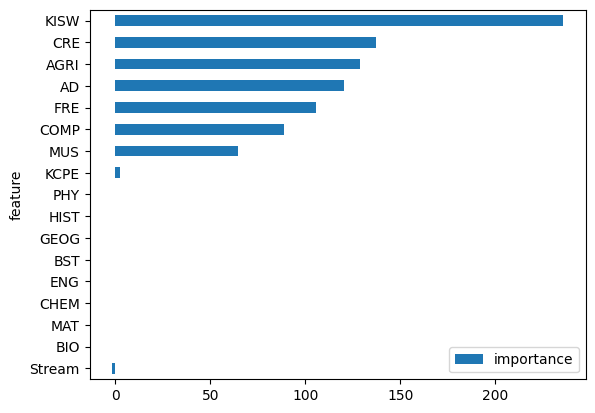

In [94]:
# @title Feature Importance Comparison

df_importance.sort_values(by='importance', ascending=True).plot(x='feature', y='importance', kind='barh')

**CHECKING FOR LINEAR RELATIONSHIP BETWEEN FEATURES AND TARGET VARIBLE**

In [95]:
df4['KCPE'].corr(df4['T mks'])

0.5357437676524659

In [96]:
X.shape[0]

607

In [97]:
y.shape[0]

607

**TO DO:**

- Try clustering



**PREDICT**

In [98]:
# Create an encoded dataFrame to match the training set
import pandas as pd

# Create a new DataFrame (df_evaluation)
column_names = ['KCPE', 'Stream', 'ENG', 'KISW', 'MAT', 'BIO', 'PHY', 'CHEM', 'HIST', 'GEOG',
                'CRE', 'AD', 'AGRI', 'COMP', 'FRE', 'MUS', 'BST']
data = {'KCPE': 327, 'Stream': 7, 'ENG': 1, 'KISW': 1, 'MAT': 1, 'BIO': 1, 'PHY': 1,
        'CHEM': 1, 'HIST': 1, 'GEOG': 1, 'CRE': 1, 'AD': 0, 'AGRI': 0, 'COMP': 1,
        'FRE': 0, 'MUS': 0, 'BST': 1}
df_evaluation = pd.DataFrame(data=[data], columns=column_names)

# Make prediction using the model
predicted_t_mks = model.predict(df_evaluation)

# Extract the predicted value
predicted_t_mks = predicted_t_mks[0]
print('Predicted T mks for KCPE 327, Stream 7:', predicted_t_mks)

Predicted T mks for KCPE 327, Stream 7: 661.0198464197412


**POLYNOMIAL**

R-squared: 0.22212749618616545
---------------------------------------------


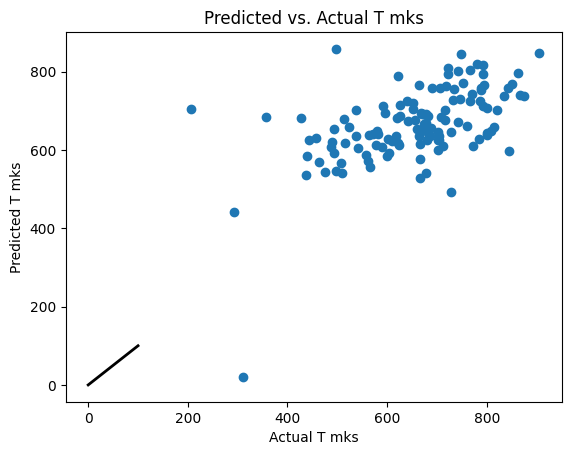

In [99]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming you have your data in DataFrames (X with features and y as the target variable)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define degree of polynomial (experiment with different values)
degree = 2  # Start with a quadratic model

# Create a polynomial features transformer
poly = PolynomialFeatures(degree=degree)

# Transform training and testing features using the polynomial transformer
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Train the model on the transformed training data
model.fit(X_train_poly, y_train)

# Make predictions on the testing set -0\

y_pred = model.predict(X_test_poly)

# Evaluate model performance (R-squared)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)



print('---------------------------------------------')

# -----------------------------------------------------
import matplotlib.pyplot as plt

# Visual comparison of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual T mks')
plt.ylabel('Predicted T mks')
plt.title('Predicted vs. Actual T mks')
plt.plot([0, 100], [0, 100], color='black', linestyle='-', linewidth=2)  # Reference line
plt.show()


In [100]:
# Had to upgrade scikitlearn to Use LinearRegression
# !pip install --upgrade scikit-learn

In [101]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge  # Import Ridge for older scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming you have your data in DataFrames (X with features and y as the target variable)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Try different polynomial degrees
degrees = [1, 2, 3]  # Experiment with different values

for degree in degrees:
    # Create a polynomial features transformer
    poly = PolynomialFeatures(degree=degree)

    # Transform training and testing features
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Create a Ridge model for L1 regularization (older scikit-learn)
    model = Ridge(alpha=0)  # alpha=0 for L1 penalty in Ridge regression

    # Train the model
    model.fit(X_train_poly, y_train)

    # Make predictions
    y_pred = model.predict(X_test_poly)

    # Evaluate model performance
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared for degree {degree} with L1 regularization:", r2)

# ... (consider exploring alternative models and feature engineering)



R-squared for degree 1 with L1 regularization: 0.26686382296309086
R-squared for degree 2 with L1 regularization: -2.9165846357768402e+20
R-squared for degree 3 with L1 regularization: -26.31562400691255


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


**RESULTS**

*The results obtained suggest a few things:*

Degree 1 (Linear Regression with L1 Regularization):

The R-squared value of 0.267 indicates that the linear model with L1 regularization explains about 26.7% of the variance in the target variable. This is a slight improvement compared to the R-squared you might have gotten from a simple linear regression without regularization.
Degrees 2 and 3 (Highly Negative R-squared):

The extremely negative R-squared values (-2.92e+20 and -26.32) for degree 2 and 3 models are nonsensical and indicate that these models are not suitable for your data. They might be suffering from severe overfitting.


**Recommendations:**

1. Stick with Degree 1 (for now): Based on the R-squared values, the linear model with L1 regularization seems to be the better option compared to higher degrees.

2. Consider Alternative Models: Since the R-squared for the linear model is still not very high, explore other models that might better capture the relationship between the features and the target variable. Some options to consider include:

- Decision trees
- Random forests
- Support Vector Machines (SVMs)
- Kernel methods (if there's a strong non-linear relationship)

3. Feature Engineering: Analyze your features and consider feature engineering techniques like:

- Removing irrelevant features
- Creating new features that might better capture the underlying relationships
- Feature scaling or normalization if features have different scales

4. Data Exploration: Create scatter plots between the target variable and individual features to visually inspect the relationships. Look for patterns that might suggest alternative model choices

# 6. Model Deployment and Refinement

* **Deploy the model:**  If satisfied with the model's performance, deploy it to a production environment for real-world use. This might involve integrating it with an application or API.
* **Monitor and refine:** Monitor the model's performance over time and retrain it with new data to maintain its effectiveness as circumstances change.

TRAIN AND SAVE THE LINEAR REGRESSION MODEL

In [73]:
import tensorflow as tf
from sklearn.linear_model import LinearRegression

class SklearnModelWrapper(tf.Module):
  def __init__(self, sklearn_model):
    super(SklearnModelWrapper, self).__init__()
    self.sklearn_model = sklearn_model

  @tf.function
  def predict(self, inputs):
    return tf.convert_to_tensor(self.sklearn_model.predict(inputs))

# Train your scikit-learn model (assuming you have X_train and y_train)
model = LinearRegression().fit(X_train, y_train)

# Wrap the model
model_wrapper = SklearnModelWrapper(model)

# Save the wrapped model
tf.saved_model.save(model_wrapper, "/content/drive/MyDrive/mlmodels/F19")



TRAINING WITH TENSORFLOW FOR COMPATIBILITY

In [114]:
print(X_train.shape)
print(y_train.shape)

(485, 17)
(485,)


In [115]:
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LinearRegression  # Used for wrapping

# Define training data (replace with your actual data)
# X_train = ...  # Your training features (2D NumPy array)
# y_train = ...  # Your training labels (1D NumPy array)

# Define a simple linear regression model
model = keras.Sequential([
  keras.layers.Dense(1)  # Single output unit for prediction
])

# Compile the model with optimizer and loss function
model.compile(optimizer='adam', loss='mse')  # Mean squared error loss

# Train the model
model.fit(X_train, y_train, epochs=10)  # Adjust epochs as needed

# Wrap the TensorFlow model for TensorFlow Serving
class SklearnModelWrapper(tf.Module):
  def __init__(self, sklearn_model):
    super(SklearnModelWrapper, self).__init__()
    self.sklearn_model = sklearn_model

  # Add input signature with expected feature shape (replace with actual number of features)
  @tf.function(input_signature=[tf.TensorSpec(shape=[None, X_train.shape[1]], dtype=tf.float32)])
  def predict(self, inputs):
    # Convert input to tensor (optional)
    inputs = tf.convert_to_tensor(inputs)
    # Call the model directly on the tensor
    return self.sklearn_model(inputs)

# Create an instance of SklearnModelWrapper with the trained model
model_wrapper = SklearnModelWrapper(model)

# Save the wrapped model using TensorFlow Serving format
try:
  tf.saved_model.save(model_wrapper, "/content/drive/MyDrive/mlmodels/F17", signatures={'serving_default': model_wrapper.predict})
  print("Model trained and saved successfully!")
except FileNotFoundError:
  print("Error: The specified path does not exist. Please create the directory first.")



Epoch 1/10
16/16 [==============================] - 0s 2ms/step - loss: 271789.9688
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 266418.8125
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 261097.4219
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 255923.5625
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 250778.2969
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 245721.2344
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 240731.3594
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 235827.4375
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 231045.0156
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 226311.7344
Model trained and saved successfully!
